<a href="https://colab.research.google.com/github/Leox48/Disinformation-Threat-Intelligence/blob/main/Classificatore_GROUP_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Analisi del dataset in formato tuple

In [ ]:
import pandas as pd

# Specifica il percorso del file Excel
file_path = '/content/Tupling.xlsx'

# Legge il file Excel e lo converte in un DataFrame
df = pd.read_excel(file_path)

df = df.sort_values(by="ID ARTICOLO", ascending=True)


In [ ]:
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print(conteggio_articoli_per_campagna)

print(f"Totale articoli:", conteggio_articoli_per_campagna.sum())

CAMPAGNA
 Covid vaccines cause autism                                       4
2016 US presidential elections                                    11
5 meter tall human                                                 1
A Cure for Wellnes Promotion                                       5
Alabama Power Positive Reputation                                  3
American Action News                                             103
Cannabis cure for cancer                                           1
Climate Change Denial                                             29
Clone Zone                                                         3
Coronavirus and vaccines in America                                8
Counter criticism of Turkey in foreign media                       2
Covid trigger Neurological Degenerative Diseases                   8
Covid vaccines cospiration theories                                3
Covid vaccines increase deaths                                     3
Disinformation on armed f

###Pre-Processing e separazione

In [ ]:
# Funzione per suddividere in base alla percentuale
def suddividi_gruppo(gruppo, perc=0.66):
    # Seleziona articoli unici per il gruppo
    articoli_unici = gruppo['ID ARTICOLO'].unique()
    # Mescola gli articoli unici
    #np.random.shuffle(articoli_unici)
    # Calcola quanti articoli dovrebbero andare in BASE
    limite = int(len(articoli_unici) * perc)
    articoli_base = articoli_unici[:limite]
    articoli_confronto = articoli_unici[limite:]

    # Crea i DataFrame BASE e CONFRONTO per il gruppo corrente
    base = gruppo[gruppo['ID ARTICOLO'].isin(articoli_base)]
    confronto = gruppo[gruppo['ID ARTICOLO'].isin(articoli_confronto)]

    return base, confronto

In [ ]:
import numpy as np

# Filtra le campagne con più di 3 articoli
campagne_eligible = df.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()
campagne_eligible = campagne_eligible[campagne_eligible > 3].index

# Crea un DataFrame filtrato con solo le campagne idonee
df_filtered = df[df['CAMPAGNA'].isin(campagne_eligible)]

# Crea liste vuote per accumulare i risultati
base_list = []
confronto_list = []

# Applica la funzione per ciascuna campagna idonea
for campagna, gruppo in df_filtered.groupby('CAMPAGNA'):
    base, confronto = suddividi_gruppo(gruppo)
    base_list.append(base)
    confronto_list.append(confronto)

# Concatena i risultati per ottenere i DataFrame finali
df_base = pd.concat(base_list)
df_confronto = pd.concat(confronto_list)


In [ ]:
# Visualizza i risultati
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_base.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print("---------DF BASE RESULTS-------------")
print(conteggio_articoli_per_campagna)

print(f"Totale articoli BASE:", conteggio_articoli_per_campagna.sum())

---------DF BASE RESULTS-------------
CAMPAGNA
 Covid vaccines cause autism                                      2
2016 US presidential elections                                    7
A Cure for Wellnes Promotion                                      3
American Action News                                             67
Climate Change Denial                                            19
Coronavirus and vaccines in America                               5
Covid trigger Neurological Degenerative Diseases                  5
Disinformation on armed forces for Ukraine                       17
Doctors found dead after cancer discovery                        23
Energy foes campaign                                              3
Fake News on OpIndia between January 2018 and June 2020          21
Fake News on child protective services                            4
False scientific health information                               7
Food Babe - False food Allarmism                                  2
F

In [ ]:
# Visualizza i risultati
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_confronto.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print("---------DF CONFRONTO RESULTS-------------")
print(conteggio_articoli_per_campagna)

print(f"Totale articoli CONFRONTO:", conteggio_articoli_per_campagna.sum())

---------DF CONFRONTO RESULTS-------------
CAMPAGNA
 Covid vaccines cause autism                                      2
2016 US presidential elections                                    4
A Cure for Wellnes Promotion                                      2
American Action News                                             36
Climate Change Denial                                            10
Coronavirus and vaccines in America                               3
Covid trigger Neurological Degenerative Diseases                  3
Disinformation on armed forces for Ukraine                       10
Doctors found dead after cancer discovery                        13
Energy foes campaign                                              3
Fake News on OpIndia between January 2018 and June 2020          12
Fake News on child protective services                            3
False scientific health information                               4
Food Babe - False food Allarmism                                

In [ ]:
# Funzione per suddividere le tuple per ogni campagna
def suddividi_tuple(gruppo, perc=0.66):
    # Mescola le righe del gruppo
    #gruppo_shuffled = gruppo.sample(frac=1).reset_index(drop=True)
    # Calcola il limite per BASE
    limite = int(len(gruppo) * perc)
    # Crea i DataFrame BASE e CONFRONTO
    base = gruppo.iloc[:limite]
    confronto = gruppo.iloc[limite:]

    return base, confronto

In [ ]:
# Filtra le campagne con meno di 3 articoli
campagne_meno_3_articoli = df.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()
campagne_meno_3_articoli = campagne_meno_3_articoli[campagne_meno_3_articoli < 3].index

# Crea un DataFrame filtrato con solo le campagne con meno di 3 articoli
df_filtered_meno_3 = df[df['CAMPAGNA'].isin(campagne_meno_3_articoli)]

# Crea liste vuote per accumulare i risultati
base_list_meno_3 = []
confronto_list_meno_3 = []

# Applica la funzione per ciascuna campagna con meno di 3 articoli
for campagna, gruppo in df_filtered_meno_3.groupby('CAMPAGNA'):
    base, confronto = suddividi_tuple(gruppo)
    base_list_meno_3.append(base)
    confronto_list_meno_3.append(confronto)

# Concatena i risultati per ottenere i DataFrame finali per le campagne con meno di 3 articoli
df_base_meno_3 = pd.concat(base_list_meno_3)
df_confronto_meno_3 = pd.concat(confronto_list_meno_3)

# Combina i risultati per ottenere i DataFrame finali
df_base_final = pd.concat([df_base, df_base_meno_3])
df_confronto_final = pd.concat([df_confronto, df_confronto_meno_3])

In [ ]:
# Visualizza i risultati
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_base_final.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print("---------DF BASE RESULTS-------------")
print(conteggio_articoli_per_campagna)

print(f"Totale articoli BASE:", conteggio_articoli_per_campagna.sum())

---------DF BASE RESULTS-------------
CAMPAGNA
 Covid vaccines cause autism                                      2
2016 US presidential elections                                    7
5 meter tall human                                                1
A Cure for Wellnes Promotion                                      3
American Action News                                             67
Cannabis cure for cancer                                          1
Climate Change Denial                                            19
Coronavirus and vaccines in America                               5
Counter criticism of Turkey in foreign media                      2
Covid trigger Neurological Degenerative Diseases                  5
Disinformation on armed forces for Ukraine                       17
Doctors found dead after cancer discovery                        23
Energy foes campaign                                              3
Fake Dementia Solution                                            2
F

In [ ]:
# Visualizza i risultati
# Raggruppa per la colonna 'CAMPAGNA' e conta i diversi 'ID ARTICOLO' per ciascuna campagna
conteggio_articoli_per_campagna = df_confronto_final.groupby('CAMPAGNA')['ID ARTICOLO'].nunique()

# Visualizza il risultato
print("---------DF CONFRONTO RESULTS-------------")
print(conteggio_articoli_per_campagna)

print(f"Totale articoli CONFRONTO:", conteggio_articoli_per_campagna.sum())

---------DF CONFRONTO RESULTS-------------
CAMPAGNA
 Covid vaccines cause autism                                      2
2016 US presidential elections                                    4
5 meter tall human                                                1
A Cure for Wellnes Promotion                                      2
American Action News                                             36
Cannabis cure for cancer                                          1
Climate Change Denial                                            10
Coronavirus and vaccines in America                               3
Counter criticism of Turkey in foreign media                      1
Covid trigger Neurological Degenerative Diseases                  3
Disinformation on armed forces for Ukraine                       10
Doctors found dead after cancer discovery                        13
Energy foes campaign                                              3
Fake Dementia Solution                                          

##Classificazione

###VOTING - Similarità Lessicale (TF-IDF)

####Esecuzione

Contatori per campagne

In [ ]:
# Ottieni la lista delle campagne uniche in df_confronto_final
campagne = df_confronto_final['CAMPAGNA'].unique()

# Crea un dizionario di contatori inizializzati a 0
contatori_campagne = {campagna: 0 for campagna in campagne}

# Visualizza il dizionario per verificare
print(contatori_campagne)

{' Covid vaccines cause autism': 0, '2016 US presidential elections': 0, 'A Cure for Wellnes Promotion': 0, 'American Action News': 0, 'Climate Change Denial': 0, 'Coronavirus and vaccines in America': 0, 'Covid trigger Neurological Degenerative Diseases': 0, 'Disinformation on armed forces for Ukraine': 0, 'Doctors found dead after cancer discovery': 0, 'Energy foes campaign ': 0, 'Fake News on OpIndia between January 2018 and June 2020': 0, 'Fake News on child protective services': 0, 'False scientific health information': 0, 'Food Babe - False food Allarmism ': 0, 'Fraudolent fact check on Covid19 in India': 0, 'Hyperpartisan in 2016 American Politic Elections': 0, 'Indian  Diffamation': 0, 'Local Report': 0, 'Medical Fake News': 0, 'Metric Media': 0, 'NFL team refuses to partecipate in pride month': 0, 'Russian troll accounts during 2016 U.S. presidential election': 0, 'Transgender Athlete': 0, 'Vaccines and illnesses fake news': 0, 'Vaccines fake news': 0, 'Viral Fake Election New

In [ ]:
# Ottieni l'elenco unico delle campagne
campagne_uniche = df_confronto_final['CAMPAGNA'].unique()

# Crea un dizionario per memorizzare i DataFrame delle diverse campagne
dataframes_campagne = {}

# Itera attraverso le campagne uniche
for campagna in campagne_uniche:
    # Filtra il DataFrame per ottenere solo le righe di una specifica campagna
    df_campagna = df_confronto_final[df_confronto_final['CAMPAGNA'] == campagna]

    # Aggiungi il DataFrame al dizionario con il nome della campagna come chiave
    dataframes_campagne[campagna] = df_campagna

    # (Opzionale) Stampa il nome della campagna e il numero di righe nel DataFrame
    print(f"Campagna: {campagna}, Numero di righe: {len(df_campagna)}")



Campagna:  Covid vaccines cause autism, Numero di righe: 31
Campagna: 2016 US presidential elections, Numero di righe: 51
Campagna: A Cure for Wellnes Promotion, Numero di righe: 12
Campagna: American Action News, Numero di righe: 365
Campagna: Climate Change Denial, Numero di righe: 146
Campagna: Coronavirus and vaccines in America, Numero di righe: 53
Campagna: Covid trigger Neurological Degenerative Diseases, Numero di righe: 40
Campagna: Disinformation on armed forces for Ukraine, Numero di righe: 112
Campagna: Doctors found dead after cancer discovery, Numero di righe: 167
Campagna: Energy foes campaign , Numero di righe: 50
Campagna: Fake News on OpIndia between January 2018 and June 2020, Numero di righe: 208
Campagna: Fake News on child protective services, Numero di righe: 45
Campagna: False scientific health information, Numero di righe: 53
Campagna: Food Babe - False food Allarmism , Numero di righe: 32
Campagna: Fraudolent fact check on Covid19 in India, Numero di righe: 11

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto_final['ID ARTICOLO'].nunique()


# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(10, 100, 5)]  # Esempio: da 0.1 a 0.95 con incrementi di 0.1

# Lista per salvare le accuratezze
accuracies = []
# Itera su ogni threshold
for threshold in thresholds:
  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito
  for campagna in campagne:
    #Resetta i contatori ad ogni nuova analisi di campagna
    contatori_campagne = {campagna: 0 for campagna in campagne}

    # Estrai le tuple dalla colonna "TUPLA"
    tuples1 = dataframes_campagne[campagna]['TUPLA'].tolist()
    tuples2 = df_base_final['TUPLA'].tolist()

    # Combine tutte le tuple in un'unica lista per il TF-IDF
    all_tuples = tuples1 + tuples2

    # Calcola la matrice TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_tuples)

    # Calcola la matrice di similarità coseno
    similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

    # Imposta la soglia di similarità
    threshold = threshold

    for i, similarities in enumerate(similarity_matrix):
        best_match_index = similarities.argmax()
        best_match_score = similarities[best_match_index]
        if best_match_score >= threshold:

          nomeCampagna= df_base_final['CAMPAGNA'].iloc[best_match_index]
          contatori_campagne[nomeCampagna]+=1

        # Debug: Stampa i dettagli della similarità e delle etichette
        # print(f"Tuple1: {tuples1[i]}")
        # print(f"Best Match: {tuples2[best_match_index]}")
        # print(f"Campagna del best match:", {df_base_final['CAMPAGNA'].iloc[best_match_index]})
        # print(f"Similarity Score: {best_match_score:.2f}")
        # print("")
    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto_final.loc[df_confronto_final['CAMPAGNA'] == campagna, 'Campagna Assegnata'] = campagna_max
    print("----------------FINE CAMPAGNA----------------")
# Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto_final[df_confronto_final['CAMPAGNA'] == df_confronto_final['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")


{' Covid vaccines cause autism': 9, '2016 US presidential elections': 0, 'A Cure for Wellnes Promotion': 0, 'American Action News': 0, 'Climate Change Denial': 0, 'Coronavirus and vaccines in America': 7, 'Covid trigger Neurological Degenerative Diseases': 0, 'Disinformation on armed forces for Ukraine': 1, 'Doctors found dead after cancer discovery': 3, 'Energy foes campaign ': 0, 'Fake News on OpIndia between January 2018 and June 2020': 0, 'Fake News on child protective services': 0, 'False scientific health information': 3, 'Food Babe - False food Allarmism ': 0, 'Fraudolent fact check on Covid19 in India': 4, 'Hyperpartisan in 2016 American Politic Elections': 0, 'Indian  Diffamation': 0, 'Local Report': 0, 'Medical Fake News': 1, 'Metric Media': 0, 'NFL team refuses to partecipate in pride month': 0, 'Russian troll accounts during 2016 U.S. presidential election': 0, 'Transgender Athlete': 2, 'Vaccines and illnesses fake news': 0, 'Vaccines fake news': 0, 'Viral Fake Election New

####Risultati

In [ ]:
print(accuracies)

[(0.1, 0.8634686346863468), (0.15, 0.8634686346863468), (0.2, 0.8597785977859779), (0.25, 0.8634686346863468), (0.3, 0.8597785977859779), (0.35, 0.8597785977859779), (0.4, 0.8634686346863468), (0.45, 0.8634686346863468), (0.5, 0.8523985239852399), (0.55, 0.8118081180811808), (0.6, 0.6900369003690037), (0.65, 0.6863468634686347), (0.7, 0.6383763837638377), (0.75, 0.5904059040590406), (0.8, 0.42066420664206644), (0.85, 0.42066420664206644), (0.9, 0.42066420664206644), (0.95, 0.42066420664206644)]


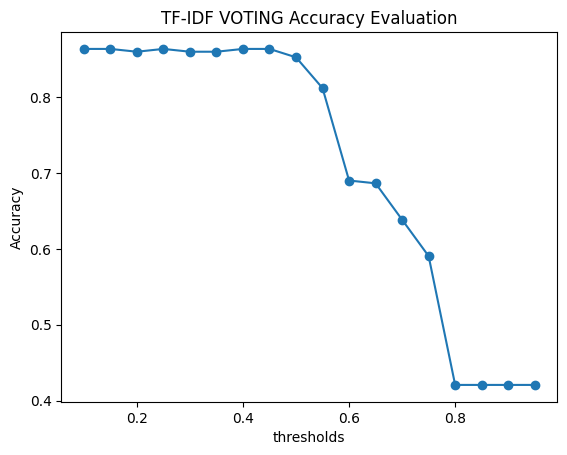

In [ ]:
import matplotlib.pyplot as plt

# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('thresholds')
plt.ylabel('Accuracy')
plt.title('TF-IDF VOTING Accuracy Evaluation')
plt.show()


In [ ]:
print(f"La massima accuratezza raggiunta è:", max(accuracy_values), "per un threshold di: ", thresholds[accuracy_values.index(max(accuracy_values))])

La massima accuratezza raggiunta è: 0.8634686346863468 per un threshold di:  0.1


###THRESHOLDING - Similarità Lessicale (TF-IDF)

L'assegnazione dei threshold per campagna è stata effettuata con un approccio empirico.
E' stato settato il threshold per campagna come NumeroArticoliCampagna * threshold (i) in diverse iterazioni.
Il threshold di similarità per contare le tuple simili invece, è stato mantenuto fisso a 0.1.

In [ ]:
# Raggruppa per la colonna 'CAMPAGNA' e conta il numero di righe per ciascuna campagna
conteggio_per_campagna = df_base_final.groupby('CAMPAGNA').size()

# Visualizza il risultato
print(conteggio_per_campagna)


####Esecuzione

In [ ]:
# Ottieni l'elenco unico delle campagne
campagne_uniche = df_confronto_final['CAMPAGNA'].unique()

# Crea un dizionario per memorizzare i DataFrame delle diverse campagne
dataframes_campagne = {}

# Itera attraverso le campagne uniche
for campagna in campagne_uniche:
    # Filtra il DataFrame per ottenere solo le righe di una specifica campagna
    df_campagna = df_confronto_final[df_confronto_final['CAMPAGNA'] == campagna]

    # Aggiungi il DataFrame al dizionario con il nome della campagna come chiave
    dataframes_campagne[campagna] = df_campagna


In [ ]:
# Funzione per aggiungere una tripla al dizionario
def aggiungi_tripla(campagna, contatore, threshold):
    triple_campagne[campagna] = (contatore, threshold, campagna)

In [ ]:
# Funzione per estrarre la tripla desiderata
def estrai_tripla_con_max_contatore(triple_campagne):
    if len(triple_campagne) == 1:
        # Se c'è solo una tripla, estrai e restituisci quella
        return list(triple_campagne.values())[0]
    elif len(triple_campagne) >= 2:
        # Se ci sono più di 2 triple, trova quella con il contatore maggiore
        return max(triple_campagne.values(), key=lambda x: x[0])
    else:
        return None  # Nel caso ci siano 0 o 2 triple, non fare nulla o gestisci diversamente

In [ ]:
# # Ottieni la lista delle campagne uniche in df_base_final
# campagne = df_base_final['CAMPAGNA'].unique()

# # Definisci i thresholds da testare
# thresholds = [i / 100 for i in range(10, 100, 5)]  # Esempio: da 0.1 a 0.95 con incrementi di 0.1
# for threshold in thresholds:
#   # Crea un dizionario con i threshold calcolati per ogni campagna
#   threshold_campagne = {campagna: conteggio * threshold for campagna, conteggio in conteggio_per_campagna.items()}

#   # # Visualizza il dizionario per verificare
#   # print(threshold_campagne)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto_final['ID ARTICOLO'].nunique()

# Lista per salvare le accuratezze
accuracies = []

# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(10, 100, 5)]  # Esempio: da 0.1 a 0.95 con incrementi di 0.1
for threshold in thresholds:
  # Crea un dizionario con i threshold calcolati per ogni campagna
  threshold_campagne = {campagna: conteggio * threshold for campagna, conteggio in conteggio_per_campagna.items()}

  # Definisci il threshold di similarità
  similarity_threshold= 0.1

  df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito
  for campagna in campagne:

    # Crea un dizionario vuoto per le triple
    triple_campagne = {}

    contatori_campagne = {campagna: 0 for campagna in campagne}
    # Estrai le tuple dalla colonna "TUPLA"
    tuples1 = dataframes_campagne[campagna]['TUPLA'].tolist()
    tuples2 = df_base_final['TUPLA'].tolist()

    # Combine tutte le tuple in un'unica lista per il TF-IDF
    all_tuples = tuples1 + tuples2

    # Calcola la matrice TF-IDF
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(all_tuples)

    # Calcola la matrice di similarità coseno
    similarity_matrix = cosine_similarity(tfidf_matrix[:len(tuples1)], tfidf_matrix[len(tuples1):])

    # Imposta la soglia di similarità
    similarity_threshold = similarity_threshold

    for i, similarities in enumerate(similarity_matrix):
        best_match_index = similarities.argmax()
        best_match_score = similarities[best_match_index]
        if best_match_score >= similarity_threshold:
          nomeCampagna= df_base_final['CAMPAGNA'].iloc[best_match_index]
          contatori_campagne[nomeCampagna]+=1

        # Debug: Stampa i dettagli della similarità e delle etichette
        # print(f"Tuple1: {tuples1[i]}")
        # print(f"Best Match: {tuples2[best_match_index]}")
        # print(f"Campagna del best match:", {df_base_final['CAMPAGNA'].iloc[best_match_index]})
        # print(f"Similarity Score: {best_match_score:.2f}")
        # print("")
    print(contatori_campagne)
    print(threshold_campagne)

    for campagnas in contatori_campagne:
      contatore = contatori_campagne[campagnas]
      thresholdes = threshold_campagne[campagnas]

      if contatore >= thresholdes:
        aggiungi_tripla(campagnas, contatore, threshold)

    print(triple_campagne)
    tripla=estrai_tripla_con_max_contatore(triple_campagne)
    print(tripla)
    if tripla != None:
      print(f"La campagna assegnata è: {tripla[2]}")
      df_confronto_final.loc[df_confronto_final['CAMPAGNA'] == campagna, 'Campagna Assegnata'] = tripla[2]
    print("----------------FINE CAMPAGNA----------------")
  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto_final[df_confronto_final['CAMPAGNA'] == df_confronto_final['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot
  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")


####Risultati

In [ ]:
# print(f"Accuratezza:", accuracy)
# df_confronto_final.to_excel('Classificazione_THRESHOLDING.xlsx', index=False)

In [ ]:
import matplotlib.pyplot as plt

# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('thresholds x campagna')
plt.ylabel('Accuracy')
plt.title('TF-IDF THRESHOLDING Accuracy Evaluation')
plt.show()


In [ ]:
print(f"La massima accuratezza raggiunta è:", max(accuracy_values), "per un threshold per campagna di: ", thresholds[accuracy_values.index(max(accuracy_values))])

###VOTING - Similarità Semantica (SBERT)

####Installazione

In [ ]:
!pip install -U sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

####Esecuzione

#####Embeddings del dataframe BASE

In [ ]:
from scipy.spatial import distance
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

# # Sample sentences
df1 = df_base_final['TUPLA'].tolist()

# Embedding di tutte le frasi di df base.
embeddings_df_base = model.encode(df1)


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

#####Separazione tuple x campagna e Embeddings

In [ ]:
# Ottieni la lista delle campagne uniche in df_confronto_final
campagne = df_confronto_final['CAMPAGNA'].unique()

# Crea un dizionario di contatori inizializzati a 0
contatori_campagne = {campagna: 0 for campagna in campagne}

# Visualizza il dizionario per verificare
print(contatori_campagne)

{' Covid vaccines cause autism': 0, '2016 US presidential elections': 0, 'A Cure for Wellnes Promotion': 0, 'American Action News': 0, 'Climate Change Denial': 0, 'Coronavirus and vaccines in America': 0, 'Covid trigger Neurological Degenerative Diseases': 0, 'Disinformation on armed forces for Ukraine': 0, 'Doctors found dead after cancer discovery': 0, 'Energy foes campaign ': 0, 'Fake News on OpIndia between January 2018 and June 2020': 0, 'Fake News on child protective services': 0, 'False scientific health information': 0, 'Food Babe - False food Allarmism ': 0, 'Fraudolent fact check on Covid19 in India': 0, 'Hyperpartisan in 2016 American Politic Elections': 0, 'Indian  Diffamation': 0, 'Local Report': 0, 'Medical Fake News': 0, 'Metric Media': 0, 'NFL team refuses to partecipate in pride month': 0, 'Russian troll accounts during 2016 U.S. presidential election': 0, 'Transgender Athlete': 0, 'Vaccines and illnesses fake news': 0, 'Vaccines fake news': 0, 'Viral Fake Election New

In [ ]:
# Ottieni l'elenco unico delle campagne
campagne_uniche = df_confronto_final['CAMPAGNA'].unique()

# Crea un dizionario per memorizzare i DataFrame delle diverse campagne
dataframes_campagne = {}
embeddings_df_articoli_campagne = {}

# Itera attraverso le campagne uniche
for campagna in campagne_uniche:
    # Filtra il DataFrame per ottenere solo le righe di una specifica campagna
    df_campagna = df_confronto_final[df_confronto_final['CAMPAGNA'] == campagna]

    # Aggiungi il DataFrame al dizionario con il nome della campagna come chiave
    dataframes_campagne[campagna] = df_campagna

    embeddings_df_articoli_campagne[campagna] = model.encode(df_campagna['TUPLA'].tolist())

    # (Opzionale) Stampa il nome della campagna e il numero di righe nel DataFrame
    print(f"Campagna: {campagna}, Numero di righe: {len(df_campagna)}")

Campagna:  Covid vaccines cause autism, Numero di righe: 31
Campagna: 2016 US presidential elections, Numero di righe: 51
Campagna: A Cure for Wellnes Promotion, Numero di righe: 12
Campagna: American Action News, Numero di righe: 365
Campagna: Climate Change Denial, Numero di righe: 146
Campagna: Coronavirus and vaccines in America, Numero di righe: 53
Campagna: Covid trigger Neurological Degenerative Diseases, Numero di righe: 40
Campagna: Disinformation on armed forces for Ukraine, Numero di righe: 112
Campagna: Doctors found dead after cancer discovery, Numero di righe: 167
Campagna: Energy foes campaign , Numero di righe: 50
Campagna: Fake News on OpIndia between January 2018 and June 2020, Numero di righe: 208
Campagna: Fake News on child protective services, Numero di righe: 45
Campagna: False scientific health information, Numero di righe: 53
Campagna: Food Babe - False food Allarmism , Numero di righe: 32
Campagna: Fraudolent fact check on Covid19 in India, Numero di righe: 11

#####Singola campagna RUN

In [ ]:
from scipy.spatial import distance

df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

#Resetta i contatori ad ogni nuova analisi di articolo nuovo
contatori_campagne = {campagna: 0 for campagna in campagne}

nomeCampagna= "A Cure for Wellnes Promotion"
df_campagna = dataframes_campagne[nomeCampagna]

print(f"\nProcessing CAMPAGNA: {nomeCampagna}")

# Itera attraverso gli embeddings del sotto-DataFrame corrente
for i, vec_confronto in enumerate(embeddings_df_articoli_campagne[nomeCampagna]):
    # Ottieni la frase originale dal sotto-DataFrame
    tupla_confronto = df_campagna['TUPLA'].iloc[i]
    print(f'\nTest sentence {i}:', tupla_confronto)

    # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
    for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento
        # Calcola la similarità
        similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

        # Ottieni la frase originale in df_base corrispondente
        # tupla_base = df_base_final['TUPLA'].iloc[j]
        # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
        # print(f"Campagna della tupla", df_base_final['CAMPAGNA'].iloc[j])

        # Aggiorna il contatore della campagna corrispondente
        if similarity_score > 0.70:
            contatori_campagne[df_base_final['CAMPAGNA'].iloc[j]] += 1

print(contatori_campagne)
campagna_max = max(contatori_campagne, key=contatori_campagne.get)
print(f"La campagna con il contatore più alto è: {campagna_max}")
df_confronto_final.loc[df_confronto_final['CAMPAGNA'] == nomeCampagna, 'Campagna Assegnata'] = campagna_max


Processing CAMPAGNA: A Cure for Wellnes Promotion

Test sentence 0: The Houston Leader - reported - As Houston prepares for the spotlight of Super Bowl LI the nations Conservative movement is preparing a boycott over the appearance of pop star turned political activist Lady Gaga.

Test sentence 1: news outlets - reported - she was going to go political

Test sentence 2: Lady Gaga - steered - clear of blatant political statements

Test sentence 3: Lady Gaga - performed - several of her previous hit songs

Test sentence 4: Lady Gaga - performed - in the most expensive Super Bowl Halftime show ever

Test sentence 5: Lady Gaga - ended - the show with a mic drop and the dramatic catch of a football while dropping from the stage

Test sentence 6: an unnamed source - said - in no way affiliated with the singer, Ms. Gaga will be using the worlds largest stage to discuss “a sickness inside us,” referring to the polarizing rhetoric that has brought Donald Trump to power, and to speak out regard

#####Run Iterato

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(50, 70, 5)]  # Esempio: da 0.5 a 0.65 con incrementi 0.05

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto_final['ID ARTICOLO'].nunique()

# Lista per salvare le accuratezze
accuracies = []

for threshold in thresholds:

  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

  for campagna in campagne:

    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    df_campagna_attuale = dataframes_campagne[campagna]

    print(f"\nProcessing CAMPANGA: {campagna}")

    # Itera attraverso gli embeddings del sotto-DataFrame corrente
    for i, vec_confronto in enumerate(embeddings_df_articoli_campagne[campagna]):
        # Ottieni la frase originale dal sotto-DataFrame
        tupla_confronto = df_campagna_attuale['TUPLA'].iloc[i]
        #print(f'\nTest sentence {i}:', tupla_confronto)

        # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
        for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

            # Calcola la similarità
            similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

            # Ottieni la frase originale in df_base corrispondente
            #tupla_base = df_base_final['TUPLA'].iloc[j]
            # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
            # print(f"Campagna della tupla", df_base_final['CAMPAGNA'].iloc[j])

            # Aggiorna il contatore della campagna corrispondente
            if similarity_score >= threshold:
                contatori_campagne[df_base_final['CAMPAGNA'].iloc[j]] += 1

    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto_final.loc[df_confronto_final['CAMPAGNA'] == campagna, 'Campagna Assegnata'] = campagna_max


  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto_final[df_confronto_final['CAMPAGNA'] == df_confronto_final['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")



Processing CAMPANGA:  Covid vaccines cause autism
{' Covid vaccines cause autism': 132, '2016 US presidential elections': 1, 'A Cure for Wellnes Promotion': 0, 'American Action News': 0, 'Climate Change Denial': 0, 'Coronavirus and vaccines in America': 145, 'Covid trigger Neurological Degenerative Diseases': 128, 'Disinformation on armed forces for Ukraine': 2, 'Doctors found dead after cancer discovery': 12, 'Energy foes campaign ': 0, 'Fake News on OpIndia between January 2018 and June 2020': 0, 'Fake News on child protective services': 0, 'False scientific health information': 192, 'Food Babe - False food Allarmism ': 0, 'Fraudolent fact check on Covid19 in India': 115, 'Hyperpartisan in 2016 American Politic Elections': 0, 'Indian  Diffamation': 0, 'Local Report': 0, 'Medical Fake News': 12, 'Metric Media': 0, 'NFL team refuses to partecipate in pride month': 0, 'Russian troll accounts during 2016 U.S. presidential election': 6, 'Transgender Athlete': 0, 'Vaccines and illnesses f

In [ ]:
print(accuracies)

[(0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513)]


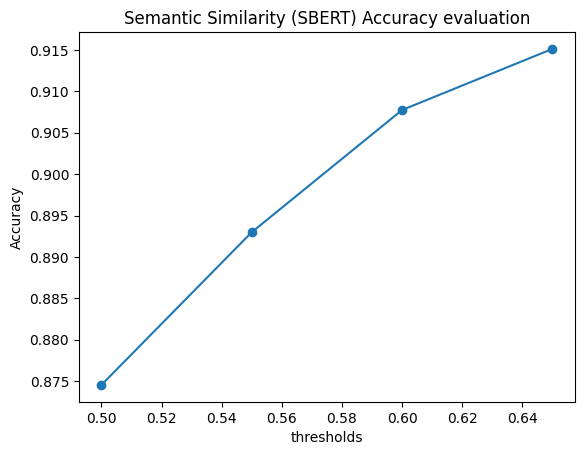

In [ ]:
import matplotlib.pyplot as plt

# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('thresholds')
plt.ylabel('Accuracy')
plt.title('Semantic Similarity (SBERT) Accuracy evaluation')
plt.show()

In [ ]:
accuracies = [(0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513)]

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(70, 100, 5)]  # Esempio: da 0.7 a 0.95 con incrementi 0.05

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto_final['ID ARTICOLO'].nunique()

for threshold in thresholds:

  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

  for campagna in campagne:

    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    df_campagna_attuale = dataframes_campagne[campagna]

    print(f"\nProcessing CAMPANGA: {campagna}")

    # Itera attraverso gli embeddings del sotto-DataFrame corrente
    for i, vec_confronto in enumerate(embeddings_df_articoli_campagne[campagna]):
        # Ottieni la frase originale dal sotto-DataFrame
        tupla_confronto = df_campagna_attuale['TUPLA'].iloc[i]
        #print(f'\nTest sentence {i}:', tupla_confronto)

        # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
        for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

            # Calcola la similarità
            similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

            # Ottieni la frase originale in df_base corrispondente
            #tupla_base = df_base_final['TUPLA'].iloc[j]
            # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
            # print(f"Campagna della tupla", df_base_final['CAMPAGNA'].iloc[j])

            # Aggiorna il contatore della campagna corrispondente
            if similarity_score >= threshold:
                contatori_campagne[df_base_final['CAMPAGNA'].iloc[j]] += 1

    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto_final.loc[df_confronto_final['CAMPAGNA'] == campagna, 'Campagna Assegnata'] = campagna_max


  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto_final[df_confronto_final['CAMPAGNA'] == df_confronto_final['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")



Processing CAMPANGA:  Covid vaccines cause autism
{' Covid vaccines cause autism': 23, '2016 US presidential elections': 0, 'A Cure for Wellnes Promotion': 0, 'American Action News': 0, 'Climate Change Denial': 0, 'Coronavirus and vaccines in America': 3, 'Covid trigger Neurological Degenerative Diseases': 3, 'Disinformation on armed forces for Ukraine': 0, 'Doctors found dead after cancer discovery': 0, 'Energy foes campaign ': 0, 'Fake News on OpIndia between January 2018 and June 2020': 0, 'Fake News on child protective services': 0, 'False scientific health information': 4, 'Food Babe - False food Allarmism ': 0, 'Fraudolent fact check on Covid19 in India': 0, 'Hyperpartisan in 2016 American Politic Elections': 0, 'Indian  Diffamation': 0, 'Local Report': 0, 'Medical Fake News': 0, 'Metric Media': 0, 'NFL team refuses to partecipate in pride month': 0, 'Russian troll accounts during 2016 U.S. presidential election': 0, 'Transgender Athlete': 0, 'Vaccines and illnesses fake news': 

In [ ]:
print(accuracies)

[(0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513), (0.7, 0.8523985239852399), (0.75, 0.7195571955719557), (0.8, 0.7749077490774908), (0.85, 0.6309963099630996), (0.9, 0.6088560885608856), (0.95, 0.5313653136531366)]


In [ ]:
accuracies = [(0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513), (0.7, 0.8523985239852399), (0.75, 0.7195571955719557), (0.8, 0.7749077490774908), (0.85, 0.6309963099630996), (0.9, 0.6088560885608856), (0.95, 0.5313653136531366)]

In [ ]:
from scipy.spatial import distance
# Definisci i thresholds da testare
thresholds = [i / 100 for i in range(10, 50, 5)]  # Esempio: da 0.1 a 0.45 con incrementi 0.05

# Conta il numero totale di articoli unici usando la colonna 'ID ARTICOLO'
numero_di_articoli_tot = df_confronto_final['ID ARTICOLO'].nunique()

for threshold in thresholds:

  #Resetta lo stato del dataframe ad ogni nuova iterazione
  df_confronto_final['Campagna Assegnata'] = 'Non Assegnata'  # Valore predefinito

  for campagna in campagne:

    #Resetta i contatori ad ogni nuova analisi di articolo nuovo
    contatori_campagne = {campagna: 0 for campagna in campagne}

    df_campagna_attuale = dataframes_campagne[campagna]

    print(f"\nProcessing CAMPANGA: {campagna}")

    # Itera attraverso gli embeddings del sotto-DataFrame corrente
    for i, vec_confronto in enumerate(embeddings_df_articoli_campagne[campagna]):
        # Ottieni la frase originale dal sotto-DataFrame
        tupla_confronto = df_campagna_attuale['TUPLA'].iloc[i]
        #print(f'\nTest sentence {i}:', tupla_confronto)

        # Confronta con tutti gli embeddings di un altro gruppo o DataFrame base
        for j, vec_base in enumerate(embeddings_df_base):  # embeddings_base è l'insieme di riferimento

            # Calcola la similarità
            similarity_score = 1 - distance.cosine(vec_confronto, vec_base)

            # Ottieni la frase originale in df_base corrispondente
            #tupla_base = df_base_final['TUPLA'].iloc[j]
            # print(f'For {tupla_base}\nSimilarity Score = {similarity_score}')
            # print(f"Campagna della tupla", df_base_final['CAMPAGNA'].iloc[j])

            # Aggiorna il contatore della campagna corrispondente
            if similarity_score >= threshold:
                contatori_campagne[df_base_final['CAMPAGNA'].iloc[j]] += 1

    print(contatori_campagne)
    campagna_max = max(contatori_campagne, key=contatori_campagne.get)
    print(f"La campagna con il contatore più alto è: {campagna_max}")
    df_confronto_final.loc[df_confronto_final['CAMPAGNA'] == campagna, 'Campagna Assegnata'] = campagna_max


  # Filtra le righe in cui 'CAMPAGNA' è uguale a 'Campagna Assegnata'
  righe_filtrate = df_confronto_final[df_confronto_final['CAMPAGNA'] == df_confronto_final['Campagna Assegnata']]

  # Conta il numero di ID ARTICOLO unici tra le righe filtrate
  numero_di_articoli_corrispondenti = righe_filtrate['ID ARTICOLO'].nunique()

  # Calcola l'accuratezza per il threshold attuale
  accuracy = numero_di_articoli_corrispondenti / numero_di_articoli_tot

  # Salva l'accuratezza per questo threshold
  accuracies.append((threshold, accuracy))
  print("----------------FINE ITERAZIONE----------------")


Processing CAMPANGA:  Covid vaccines cause autism
{' Covid vaccines cause autism': 848, '2016 US presidential elections': 937, 'A Cure for Wellnes Promotion': 616, 'American Action News': 8434, 'Climate Change Denial': 2659, 'Coronavirus and vaccines in America': 2121, 'Covid trigger Neurological Degenerative Diseases': 1303, 'Disinformation on armed forces for Ukraine': 1873, 'Doctors found dead after cancer discovery': 6732, 'Energy foes campaign ': 319, 'Fake News on OpIndia between January 2018 and June 2020': 3720, 'Fake News on child protective services': 916, 'False scientific health information': 2644, 'Food Babe - False food Allarmism ': 243, 'Fraudolent fact check on Covid19 in India': 4604, 'Hyperpartisan in 2016 American Politic Elections': 2410, 'Indian  Diffamation': 239, 'Local Report': 286, 'Medical Fake News': 23106, 'Metric Media': 741, 'NFL team refuses to partecipate in pride month': 391, 'Russian troll accounts during 2016 U.S. presidential election': 2520, 'Trans

In [ ]:
print(accuracies)

[(0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513), (0.7, 0.8523985239852399), (0.75, 0.7195571955719557), (0.8, 0.7749077490774908), (0.85, 0.6309963099630996), (0.9, 0.6088560885608856), (0.95, 0.5313653136531366), (0.1, 0.3062730627306273), (0.15, 0.3874538745387454), (0.2, 0.47232472324723246), (0.25, 0.4981549815498155), (0.3, 0.5535055350553506), (0.35, 0.5645756457564576), (0.4, 0.5867158671586716), (0.45, 0.8671586715867159)]


In [ ]:
# accuracies = [(0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513), (0.7, 0.8523985239852399), (0.75, 0.7195571955719557), (0.8, 0.7749077490774908), (0.85, 0.6309963099630996), (0.9, 0.6088560885608856), (0.95, 0.5313653136531366), (0.1, 0.3062730627306273), (0.15, 0.3874538745387454), (0.2, 0.47232472324723246), (0.25, 0.4981549815498155), (0.3, 0.5535055350553506), (0.35, 0.5645756457564576), (0.4, 0.5867158671586716), (0.45, 0.8671586715867159)]

####Risultati

In [ ]:
# Ordina la lista per il primo valore di ogni tupla
accuracies_ordinate = sorted(accuracies, key=lambda x: x[0])

# Visualizza la lista ordinata
print(accuracies_ordinate)

[(0.1, 0.3062730627306273), (0.15, 0.3874538745387454), (0.2, 0.47232472324723246), (0.25, 0.4981549815498155), (0.3, 0.5535055350553506), (0.35, 0.5645756457564576), (0.4, 0.5867158671586716), (0.45, 0.8671586715867159), (0.5, 0.8745387453874539), (0.55, 0.8929889298892989), (0.6, 0.9077490774907749), (0.65, 0.915129151291513), (0.7, 0.8523985239852399), (0.75, 0.7195571955719557), (0.8, 0.7749077490774908), (0.85, 0.6309963099630996), (0.9, 0.6088560885608856), (0.95, 0.5313653136531366)]


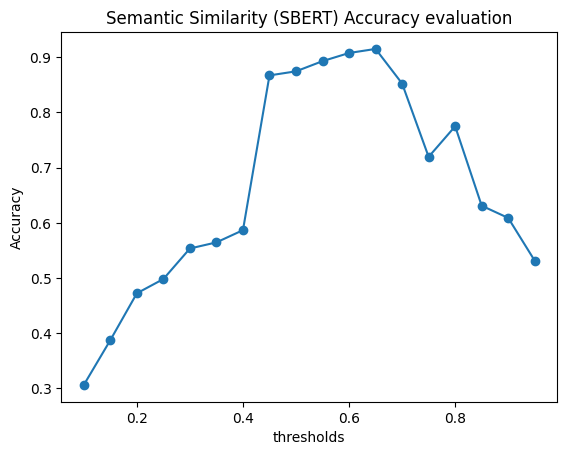

In [ ]:
# Estrai soglie e accuratezze dalla lista
thresholds, accuracy_values = zip(*accuracies_ordinate)

# Crea il grafico
plt.plot(thresholds, accuracy_values, marker='o')
plt.xlabel('thresholds')
plt.ylabel('Accuracy')
plt.title('Semantic Similarity (SBERT) Accuracy evaluation')
plt.show()

In [ ]:
print(f"La massima accuratezza raggiunta è:", max(accuracy_values), "per un threshold di: ", thresholds[accuracy_values.index(max(accuracy_values))])

La massima accuratezza raggiunta è: 0.915129151291513 per un threshold di:  0.65
